<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/10_Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import asanyarray, save
from numpy.core.multiarray import asarray
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy
from google.colab import drive
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/10_dishes_Train/'
photos, labels = list(), list()

In [ ]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('Banhmi'):
    output = 1.0
  if file.startswith('Banhxeo'):
    output = 2.0
  if file.startswith('Comtam'):
    output = 3.0
  if file.startswith('Bunbo'):
    output = 4.0 
  if file.startswith('Cakhoto'):
    output = 5.0
  if file.startswith('Xoi'):
    output = 6.0
  if file.startswith('Hutieu'):
    output = 7.0
  if file.startswith('Banhbeo'):
    output = 8.0
  if file.startswith('Banhtet'):
    output = 9.0
  if file.startswith('Goicuon'):
    output = 10.0
  photo = load_img(folder+file, target_size = (100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

save('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/afterprocessing/VN_dishes_photos.npy', photos)
save('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/afterprocessing/VN_dishes_labels.npy', labels)

photos = np.load('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/afterprocessing/VN_dishes_photos.npy')
labels = np.load('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/afterprocessing/VN_dishes_labels.npy')

x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=11)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(100, 100, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11, activation='softmax'))

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
35/35 [==============================] - 60s 2s/step - loss: 2.1922 - accuracy: 0.2202
Epoch 2/10
35/35 [==============================] - 58s 2s/step - loss: 1.8730 - accuracy: 0.3567
Epoch 3/10
35/35 [==============================] - 56s 2s/step - loss: 1.5572 - accuracy: 0.4768
Epoch 4/10
35/35 [==============================] - 59s 2s/step - loss: 1.1668 - accuracy: 0.6181
Epoch 5/10
35/35 [==============================] - 63s 2s/step - loss: 0.8710 - accuracy: 0.7188
Epoch 6/10
35/35 [==============================] - 60s 2s/step - loss: 0.5554 - accuracy: 0.8127
Epoch 7/10
35/35 [==============================] - 59s 2s/step - loss: 0.2824 - accuracy: 0.9216
Epoch 8/10
35/35 [==============================] - 57s 2s/step - loss: 0.1495 - accuracy: 0.9589
Epoch 9/10
35/35 [==============================] - 54s 2s/step - loss: 0.0848 - accuracy: 0.9806
Epoch 10/10
35/35 [==============================] - 56s 2s/step - loss: 0.0380 - accuracy: 0.9903


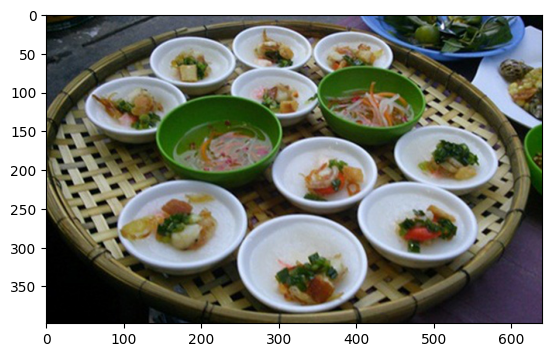

1/1 [==============================] - 0s 367ms/step
8
Món:  Bánh bèo


In [9]:
img = Image.open('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/10_dishes_Test/Banhbeo (89).jpg')

IMG = img
img = img.resize((100, 100))

img = np.asarray(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết", "Bánh mì", "Bánh xèo", "Cơm tấm", "Bún bò", "Cá kho tộ", "Xôi", "Hủ tiếu", "Bánh bèo", "Bánh tét", "Gỏi cuốn"]
temp1 = matrix[0]
print(temp1)
print("Món: ", class_names[temp1])

In [10]:
model.save('/content/drive/MyDrive/BAOCAOAI/10_Vietnamese_dishes/model/10_VN_dishes.h5')